In [1]:
# importing relevent libraries
import cv2 as cv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk
import os
import pandas as pd
import webcolors

<Figure size 432x288 with 0 Axes>

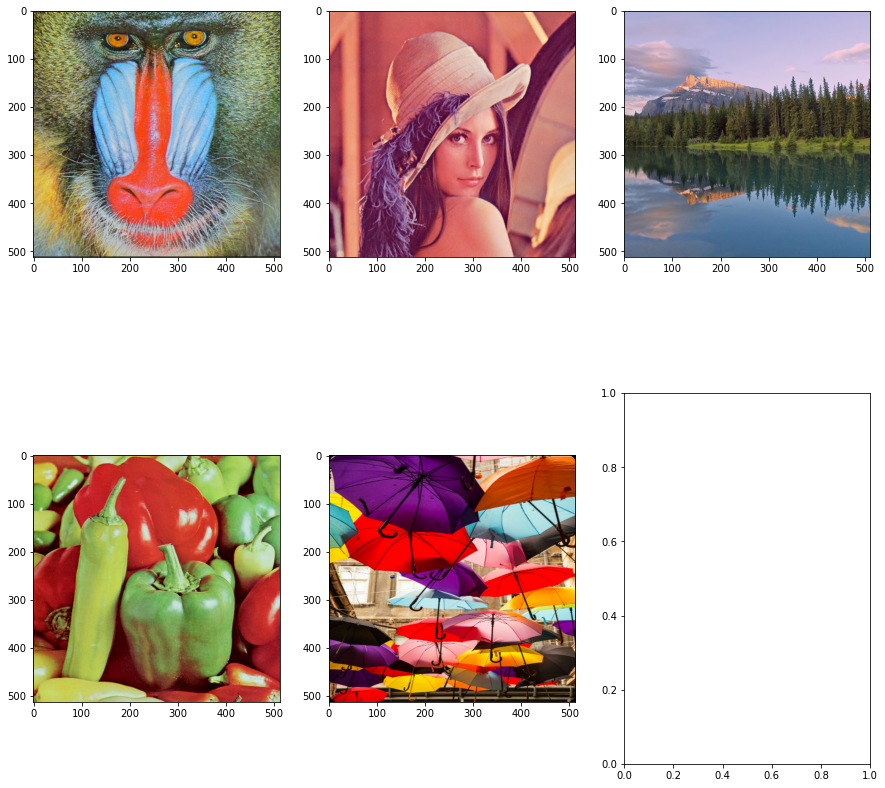

In [2]:
# reading images
baboon = cv.imread('baboon.png')
lenna = cv.imread('lenna.png')
peppers = cv.imread('peppers.png')
umbrella = cv.imread('umbrella.png')
landscape = cv.imread('landscape.jpg')


# converting BGR to RGB
baboon = cv.cvtColor(baboon, cv.COLOR_BGR2RGB)
lenna = cv.cvtColor(lenna, cv.COLOR_BGR2RGB)
peppers = cv.cvtColor(peppers, cv.COLOR_BGR2RGB)
umbrella = cv.cvtColor(umbrella, cv.COLOR_BGR2RGB)
landscape = cv.cvtColor(landscape, cv.COLOR_BGR2RGB)



# plotting images
plt.figure()
f, axarr = plt.subplots(2,3) 
f.set_figheight(15)
f.set_figwidth(15)


axarr[0][0].imshow(baboon)
axarr[0][1].imshow(lenna)
axarr[0][2].imshow(landscape)
axarr[1][0].imshow(peppers)
axarr[1][1].imshow(umbrella)


In [3]:
# printing sizes of the original images

sizes = []

baboon_size = os.path.getsize('baboon.png')
lenna_size = os.path.getsize('lenna.png')
peppers_size = os.path.getsize('peppers.png')
umbrella_size = os.path.getsize('umbrella.png')
lanbscape_size = os.path.getsize('landscape.jpg')

sizes.append(baboon_size)
sizes.append(lenna_size)
sizes.append(peppers_size)
sizes.append(umbrella_size)
sizes.append(lanbscape_size)


print('original size of the baboon image= ', baboon_size, 'bytes')
print('original size of the lenna image= ', lenna_size, 'bytes')
print('original size of the peppers image= ', peppers_size, 'bytes')
print('original size of the umbrella image= ', umbrella_size, 'bytes')
print('original size of the landscape image= ', lanbscape_size, 'bytes')

original size of the baboon image=  637192 bytes
original size of the lenna image=  473831 bytes
original size of the peppers image=  538749 bytes
original size of the umbrella image=  478724 bytes
original size of the landscape image=  51570 bytes


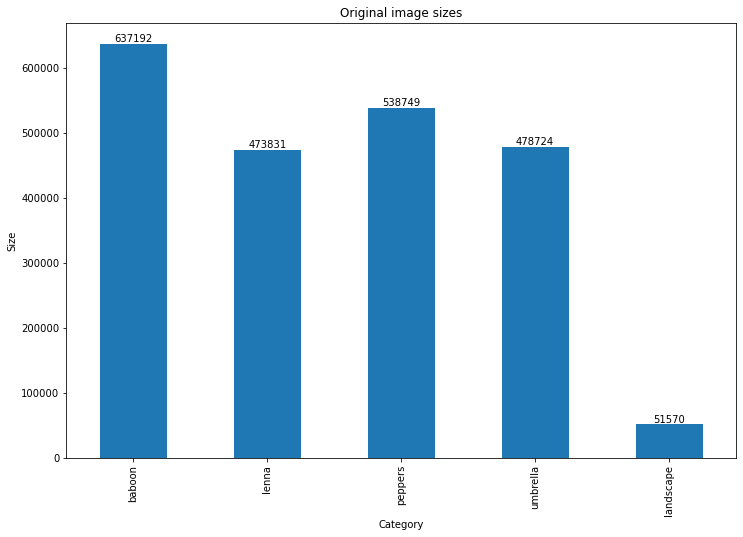

In [4]:
# plotting the sizes of the original images

items = ['baboon', 'lenna', 'peppers', 'umbrella', 'landscape']

sizes_series = pd.Series(np.array(sizes))

x_labels = items

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = sizes_series.plot(kind='bar')
ax.set_title('Original image sizes')
ax.set_xlabel('Category')
ax.set_ylabel('Size')
ax.set_xticklabels(x_labels)

rects = ax.patches

labels = sizes

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

<Figure size 432x288 with 0 Axes>

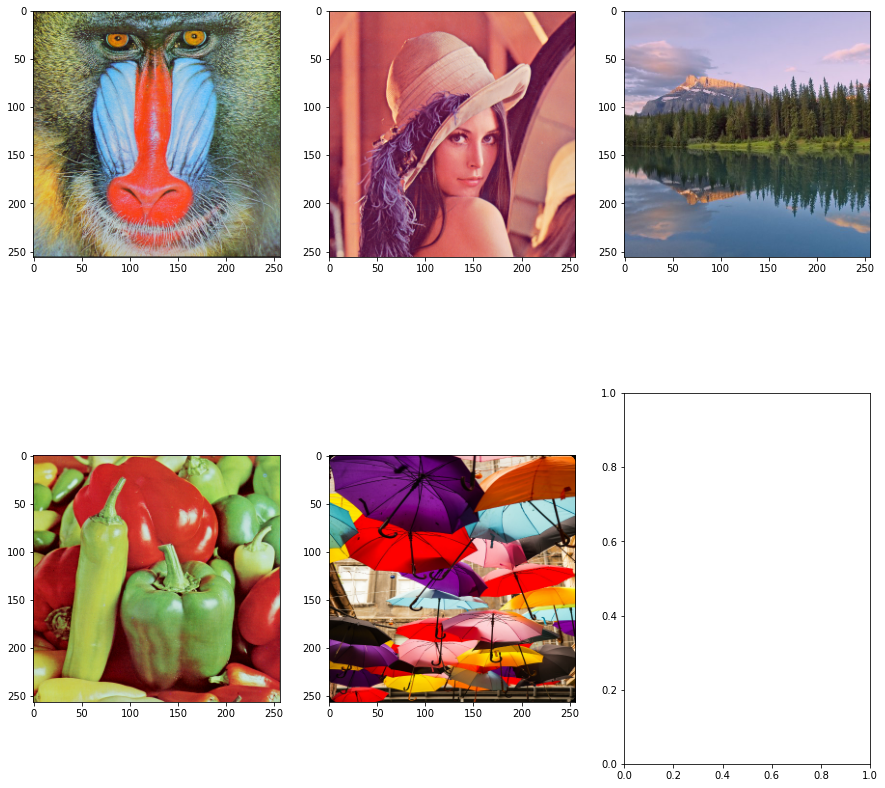

In [5]:
# resizing the images to (256,256,3)
width,height = 256, 256

dim = (width, height)

baboon_r = cv.resize(baboon, dim, interpolation = cv.INTER_AREA)
lenna_r = cv.resize(lenna, dim, interpolation = cv.INTER_AREA)
peppers_r = cv.resize(peppers, dim, interpolation = cv.INTER_AREA)
umbrella_r = cv.resize(umbrella, dim, interpolation = cv.INTER_AREA)
landscape_r = cv.resize(landscape, dim, interpolation = cv.INTER_AREA)


# plotting resized images

plt.figure()

f, axarr = plt.subplots(2,3)
f.set_figheight(15)
f.set_figwidth(15)


axarr[0][0].imshow(baboon_r)
axarr[0][1].imshow(lenna_r)
axarr[0][2].imshow(landscape_r)
axarr[1][0].imshow(peppers_r)
axarr[1][1].imshow(umbrella_r)


In [6]:
# reshaping the images to a 2D numpy arrays i.e. flattening the images

w, h, d = baboon_r.shape # because all the images are the same size this works fine

baboon_array = np.reshape(baboon_r, (w * h, d))
lenna_array = np.reshape(lenna_r, (w * h, d))
peppers_array = np.reshape(peppers_r, (w * h, d))
umbrella_array = np.reshape(umbrella_r, (w * h, d))
landscape_array = np.reshape(landscape_r, (w * h, d))

In [7]:
#Finding how many unique colors a single image contains
unique_colors_lens = []

unique_colors_baboon = set( tuple(v) for m2d in baboon_r for v in m2d )
unique_colors_lenna = set( tuple(v) for m2d in lenna_r for v in m2d )
unique_colors_peppers = set( tuple(v) for m2d in peppers_r for v in m2d )
unique_colors_umbrella = set( tuple(v) for m2d in umbrella_r for v in m2d )
unique_colors_landscape = set( tuple(v) for m2d in landscape_r for v in m2d )

unique_colors_lens.append(len(unique_colors_baboon))
unique_colors_lens.append(len(unique_colors_lenna))
unique_colors_lens.append(len(unique_colors_peppers))
unique_colors_lens.append(len(unique_colors_umbrella))
unique_colors_lens.append(len(unique_colors_landscape))


print('number of unique colors baboon   =', len(unique_colors_baboon))
print('number of unique colors lenna    =', len(unique_colors_lenna))
print('number of unique colors peppers  =', len(unique_colors_peppers))
print('number of unique colors umbrella =', len(unique_colors_umbrella))
print('number of unique colors landscape =', len(unique_colors_landscape))

number of unique colors baboon   = 62070
number of unique colors lenna    = 48331
number of unique colors peppers  = 54108
number of unique colors umbrella = 45085
number of unique colors landscape = 34973


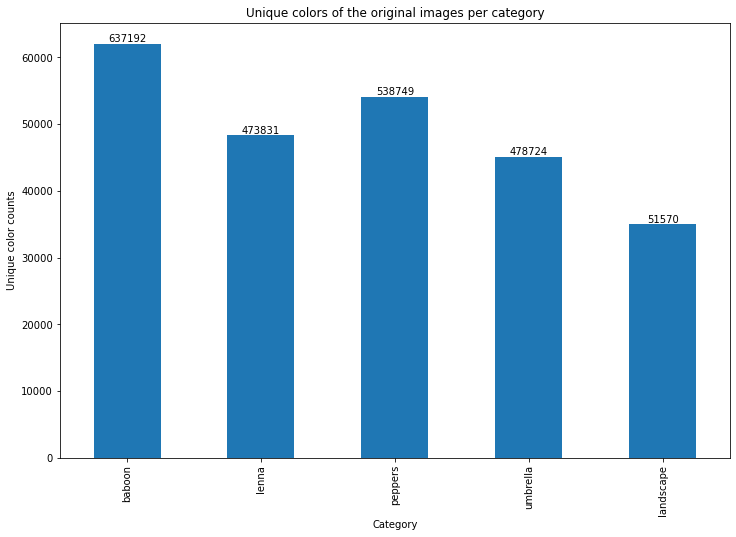

In [8]:
# plotting the unique color sizes of the original images

items = ['baboon', 'lenna', 'peppers', 'umbrella', 'landscape']

sizes_series = pd.Series(np.array(unique_colors_lens))

x_labels = items

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = sizes_series.plot(kind='bar')
ax.set_title('Unique colors of the original images per category')
ax.set_xlabel('Category')
ax.set_ylabel('Unique color counts')
ax.set_xticklabels(x_labels)

rects = ax.patches

labels = sizes

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

In [9]:
# scaling the data created problems since scale of each feature is at the same size (0, 255) we do not need to scale our data

from sklearn.preprocessing import StandardScaler

scaler_baboon = StandardScaler()
scaler_lenna = StandardScaler()
scaler_peppers = StandardScaler()
scaler_umbrella = StandardScaler()
scaler_landscape = StandardScaler()


# scaled_baboon = scaler_baboon.fit_transform(baboon_array)
# scaled_lenna = scaler_lenna.fit_transform(lenna_array)
# scaled_peppers = scaler_peppers.fit_transform(peppers_array)
# scaled_umbrella = scaler_umbrella.fit_transform(umbrella_array)
# scaled_landscape = scaler_landscape.fit_transform(landscape_array)


scaled_baboon = baboon_array
scaled_lenna = lenna_array
scaled_peppers = peppers_array
scaled_umbrella = umbrella_array
scaled_landscape = landscape_array

In [10]:
# initializing Kmeans clustering methods and fitting each clustering methods then appending them to their relevent lists

from sklearn.cluster import KMeans

cluster_nos = 2 ** np.arange(1,9)


kmeans_baboons = []
kmeans_lenas = []
kmenas_pepperss = []
kmeans_umbrellas = []
kmeans_landscapes = []

for i in range(len(cluster_nos)):
    
    no = cluster_nos[i]
    method = "k-means++"
    
    kmeans_baboon = KMeans(n_clusters= no, init= method, random_state=0)
    kmeans_lena = KMeans(n_clusters= no, init= method, random_state=0)
    kmeans_peppers = KMeans(n_clusters= no, init= method, random_state=0)
    kmeans_umbrella = KMeans(n_clusters= no, init= method, random_state=0)
    kmeans_landscape = KMeans(n_clusters= no, init= method, random_state=0)

    kmeans_baboon.fit(scaled_baboon)
    kmeans_lena.fit(scaled_lenna)
    kmeans_peppers.fit(scaled_peppers)
    kmeans_umbrella.fit(scaled_umbrella)
    kmeans_landscape.fit(scaled_landscape)
    
    kmeans_baboons.append(kmeans_baboon)
    kmeans_lenas.append(kmeans_lena)
    kmenas_pepperss.append(kmeans_peppers)
    kmeans_umbrellas.append(kmeans_umbrella)
    kmeans_landscapes.append(kmeans_landscape)






In [11]:
# Replace each pixel with its centroid points and clip so it fits between (0, 255)

baboon_compressed_images = []
lenna_compressed_images = []
peppers_compressed_images = []
umbrella_compressed_images = []
landscape_compressed_images = []


for i in range(len(cluster_nos)):
        
    pixel_centroid_baboon = np.array([list(kmeans_baboons[i].cluster_centers_[label]) for label in kmeans_baboons[i].labels_])
    pixel_centroid_lenna = np.array([list(kmeans_lenas[i].cluster_centers_[label]) for label in kmeans_lenas[i].labels_])
    pixel_centroid_peppers = np.array([list(kmenas_pepperss[i].cluster_centers_[label]) for label in kmenas_pepperss[i].labels_])
    pixel_centroid_umbrella = np.array([list(kmeans_umbrellas[i].cluster_centers_[label]) for label in kmeans_umbrellas[i].labels_])
    pixel_centroid_landscape = np.array([list(kmeans_landscapes[i].cluster_centers_[label]) for label in kmeans_landscapes[i].labels_])

    baboon_compressed = np.reshape(pixel_centroid_baboon, (w ,h, d))
    lenna_compressed = np.reshape(pixel_centroid_lenna, (w ,h, d))
    peppers_compressed = np.reshape(pixel_centroid_peppers, (w ,h, d))
    umbrella_compressed = np.reshape(pixel_centroid_umbrella, (w ,h, d))
    landscape_compressed = np.reshape(pixel_centroid_landscape, (w ,h, d))
    
    baboon_compressed = np.clip(baboon_compressed.astype('uint8'), 0, 255)
    lenna_compressed = np.clip(lenna_compressed.astype('uint8'), 0, 255)
    peppers_compressed = np.clip(peppers_compressed.astype('uint8'), 0, 255)
    umbrella_compressed = np.clip(umbrella_compressed.astype('uint8'), 0, 255)
    landscape_compressed = np.clip(landscape_compressed.astype('uint8'), 0, 255)


    
    baboon_compressed_images.append(baboon_compressed)
    lenna_compressed_images.append(lenna_compressed)
    peppers_compressed_images.append(peppers_compressed)
    umbrella_compressed_images.append(umbrella_compressed)
    landscape_compressed_images.append(landscape_compressed)

In [12]:
titles= ['cluster no = 2', 'cluster no = 4','cluster no = 8','cluster no = 16','cluster no = 32','cluster no = 64','cluster no = 128','cluster no = 256', 'original image']


In [13]:
# method to display the copressed images

def show_compressed_images(compressed_images, original_image, titles):
    
    # plotting images
    
    f, axarr = plt.subplots(3,3) 
    
    f.set_figheight(15)
    f.set_figwidth(15)

    axarr[0][0].imshow(compressed_images[0])
    axarr[0][0].title.set_text(titles[0])
    
    axarr[0][1].imshow(compressed_images[1])
    axarr[0][1].title.set_text(titles[1])
    
    axarr[0][2].imshow(compressed_images[2])
    axarr[0][2].title.set_text(titles[2])

    axarr[1][0].imshow(compressed_images[3])
    axarr[1][0].title.set_text(titles[3])
    
    axarr[1][1].imshow(compressed_images[4])
    axarr[1][1].title.set_text(titles[4])
    
    axarr[1][2].imshow(compressed_images[5])
    axarr[1][2].title.set_text(titles[5])
    
    axarr[2][0].imshow(compressed_images[6])
    axarr[2][0].title.set_text(titles[6])
    
    axarr[2][1].imshow(compressed_images[7])
    axarr[2][1].title.set_text(titles[7])
    
    axarr[2][2].imshow(original_image)
    axarr[2][2].title.set_text(titles[8])


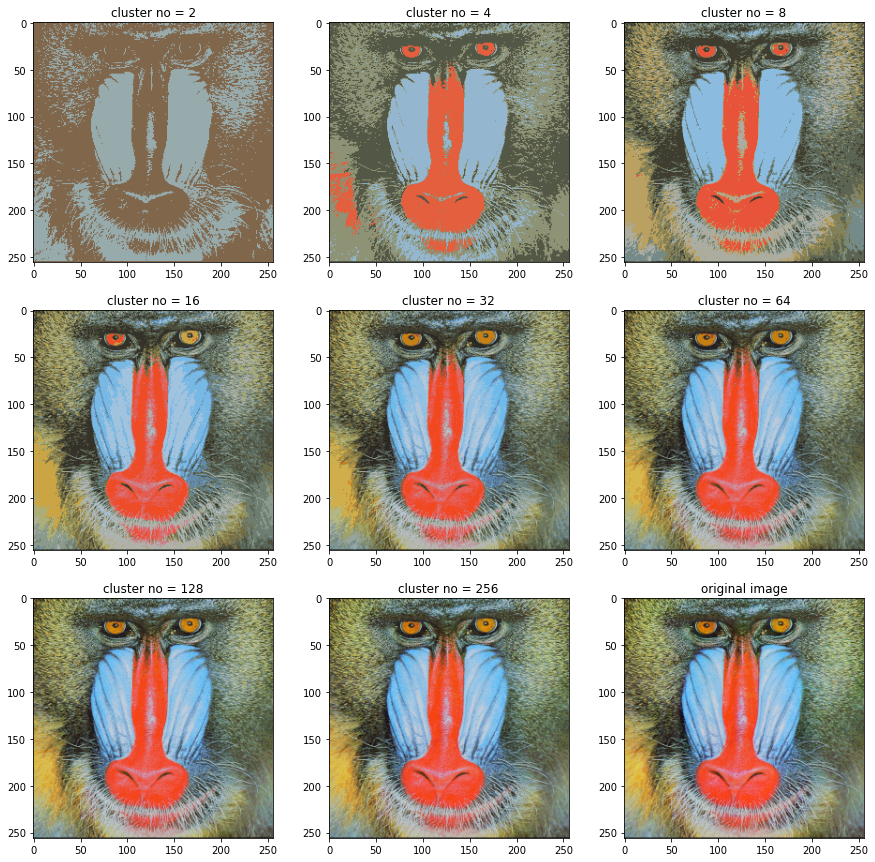

In [14]:
show_compressed_images(baboon_compressed_images, baboon_r, titles)

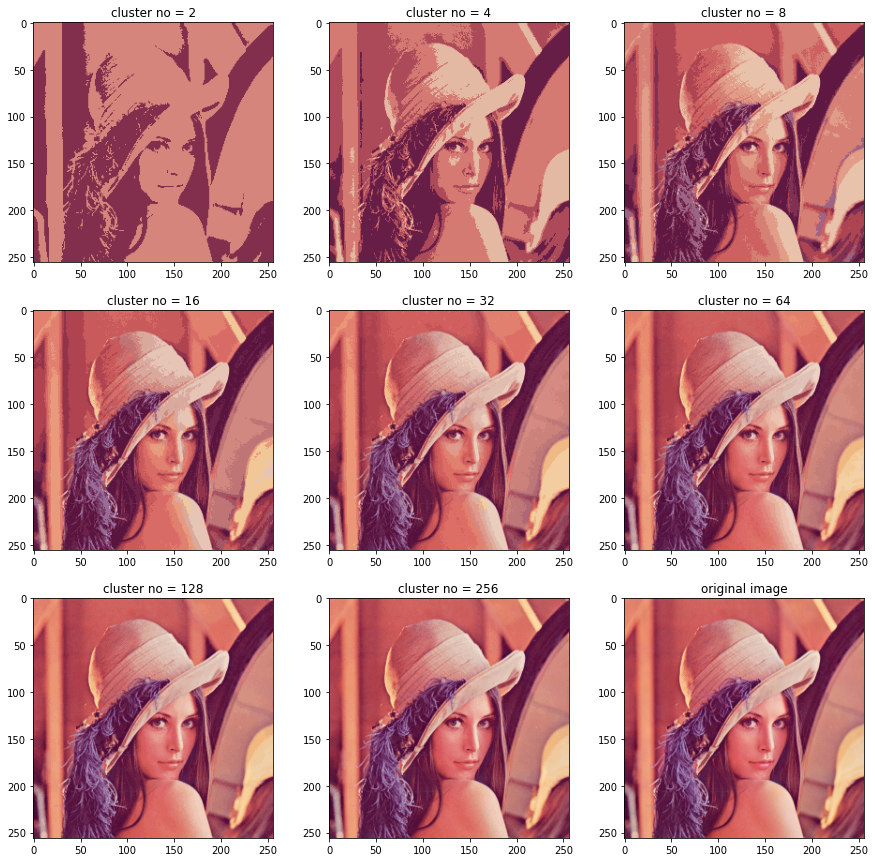

In [15]:
show_compressed_images(lenna_compressed_images, lenna_r, titles)

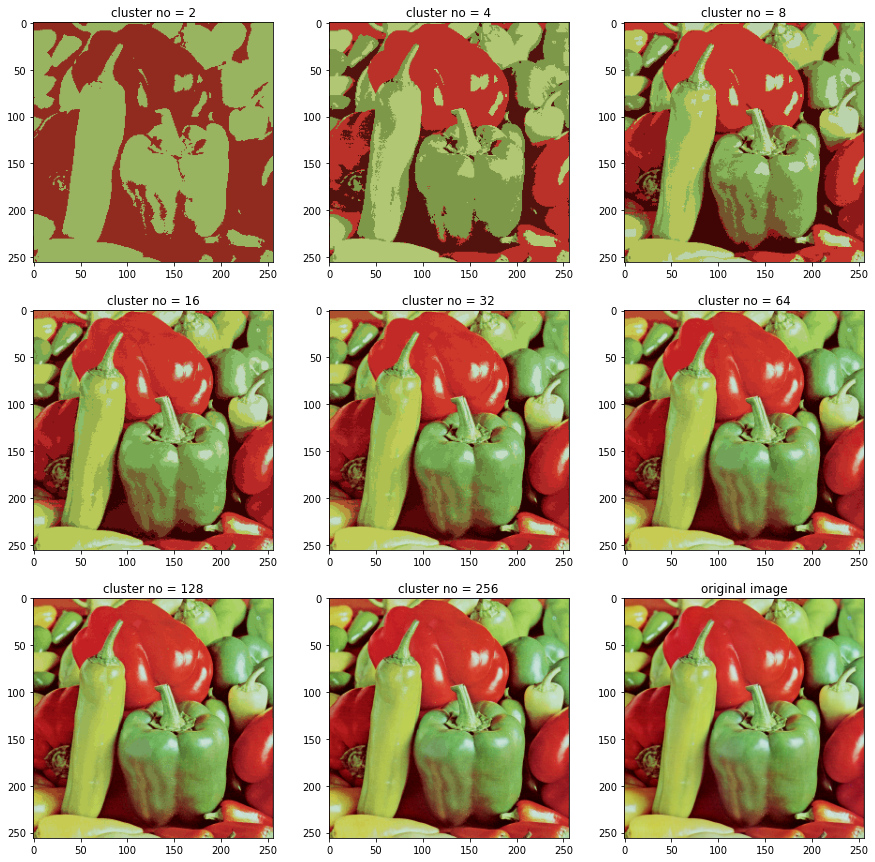

In [16]:
show_compressed_images(peppers_compressed_images, peppers_r, titles)

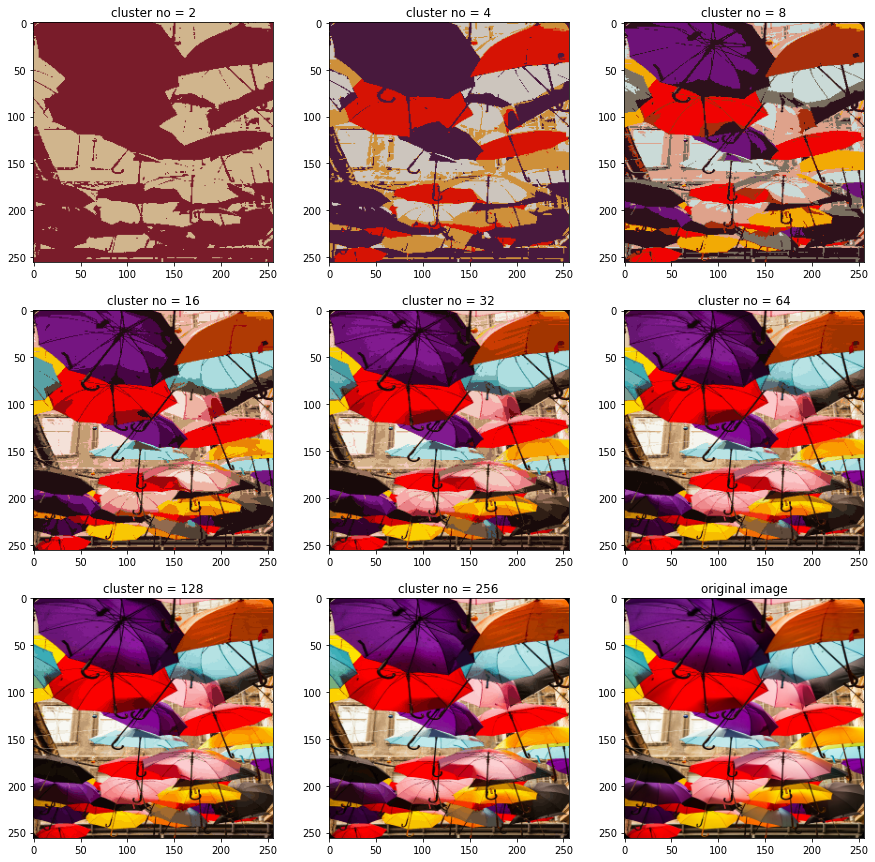

In [17]:
show_compressed_images(umbrella_compressed_images, umbrella_r, titles)

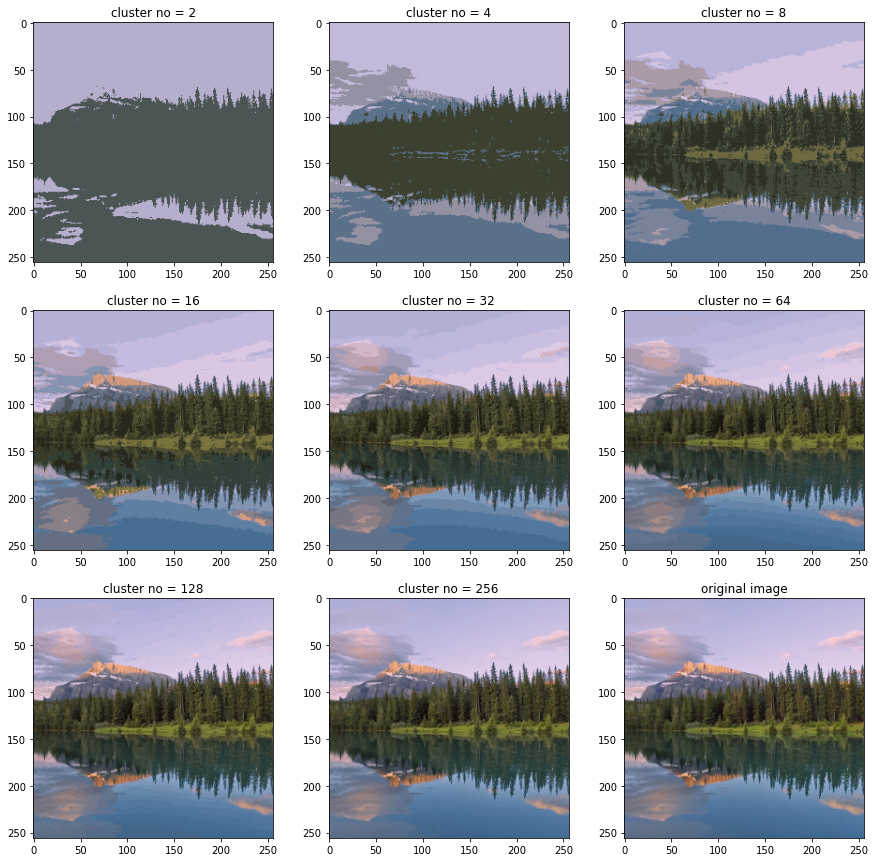

In [18]:
show_compressed_images(landscape_compressed_images, landscape_r, titles)

In [19]:
# method for saving images filename formot is as follow [type]_compressed_[cluster_no]_no_of_clusters.png

def save_images(type_,images):
    filenames = []
    for i in range(len(images)):
        img = images[i]
        cluster_no = str(2**(i + 1))
        filename = type_ + '_compressed_' + cluster_no + '_no_of_clusters.png'
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        cv.imwrite(filename, img) 
        filenames.append(filename)
        
    return filenames


In [20]:
# save the compresed images to get the sizes of the images

filenames_baboon = save_images('baboon', baboon_compressed_images)
filenames_lenna = save_images('lenna', lenna_compressed_images)
filenames_peppers = save_images('peppers', peppers_compressed_images)
filenames_umbrella = save_images('umbrella', umbrella_compressed_images)
filenames_landscape = save_images('landscape', landscape_compressed_images)

In [21]:
# method to get the size of the images and printing them to the console

def get_and_print_sizes_of_the_compressed_images(type_):
    sizes = []
    for i in range(8):
        cluster_no = str(2**(i + 1))
        filename = type_ + '_compressed_' + cluster_no + '_no_of_clusters.png'
        size = os.path.getsize(filename)
        print('compressed size of the ' + type_ + ' image with '+ cluster_no + ' clusters =', size, 'bytes')
        sizes.append(size)
    
    return sizes


In [22]:
sizes_baboon = get_and_print_sizes_of_the_compressed_images('baboon')

compressed size of the baboon image with 2 clusters = 21844 bytes
compressed size of the baboon image with 4 clusters = 38254 bytes
compressed size of the baboon image with 8 clusters = 66875 bytes
compressed size of the baboon image with 16 clusters = 96265 bytes
compressed size of the baboon image with 32 clusters = 118183 bytes
compressed size of the baboon image with 64 clusters = 135872 bytes
compressed size of the baboon image with 128 clusters = 144775 bytes
compressed size of the baboon image with 256 clusters = 152122 bytes


In [23]:
sizes_lenna = get_and_print_sizes_of_the_compressed_images('lenna')

compressed size of the lenna image with 2 clusters = 11768 bytes
compressed size of the lenna image with 4 clusters = 27872 bytes
compressed size of the lenna image with 8 clusters = 49808 bytes
compressed size of the lenna image with 16 clusters = 65397 bytes
compressed size of the lenna image with 32 clusters = 83843 bytes
compressed size of the lenna image with 64 clusters = 100418 bytes
compressed size of the lenna image with 128 clusters = 112663 bytes
compressed size of the lenna image with 256 clusters = 122011 bytes


In [24]:
sizes_umbrella = get_and_print_sizes_of_the_compressed_images('umbrella')

compressed size of the umbrella image with 2 clusters = 8714 bytes
compressed size of the umbrella image with 4 clusters = 18092 bytes
compressed size of the umbrella image with 8 clusters = 30058 bytes
compressed size of the umbrella image with 16 clusters = 42804 bytes
compressed size of the umbrella image with 32 clusters = 57574 bytes
compressed size of the umbrella image with 64 clusters = 69353 bytes
compressed size of the umbrella image with 128 clusters = 78956 bytes
compressed size of the umbrella image with 256 clusters = 87880 bytes


In [25]:
sizes_peppers = get_and_print_sizes_of_the_compressed_images('peppers')

compressed size of the peppers image with 2 clusters = 9138 bytes
compressed size of the peppers image with 4 clusters = 19505 bytes
compressed size of the peppers image with 8 clusters = 34628 bytes
compressed size of the peppers image with 16 clusters = 53585 bytes
compressed size of the peppers image with 32 clusters = 69835 bytes
compressed size of the peppers image with 64 clusters = 82019 bytes
compressed size of the peppers image with 128 clusters = 97806 bytes
compressed size of the peppers image with 256 clusters = 108578 bytes


In [26]:
sizes_landscape = get_and_print_sizes_of_the_compressed_images('landscape')

compressed size of the landscape image with 2 clusters = 5678 bytes
compressed size of the landscape image with 4 clusters = 12895 bytes
compressed size of the landscape image with 8 clusters = 31788 bytes
compressed size of the landscape image with 16 clusters = 39765 bytes
compressed size of the landscape image with 32 clusters = 54699 bytes
compressed size of the landscape image with 64 clusters = 67367 bytes
compressed size of the landscape image with 128 clusters = 75630 bytes
compressed size of the landscape image with 256 clusters = 83855 bytes


In [27]:
# appending original sizes 

sizes_baboon.append(sizes[0])
sizes_lenna.append(sizes[1])
sizes_umbrella.append(sizes[2])
sizes_peppers.append(sizes[3])
sizes_landscape.append(sizes[4])

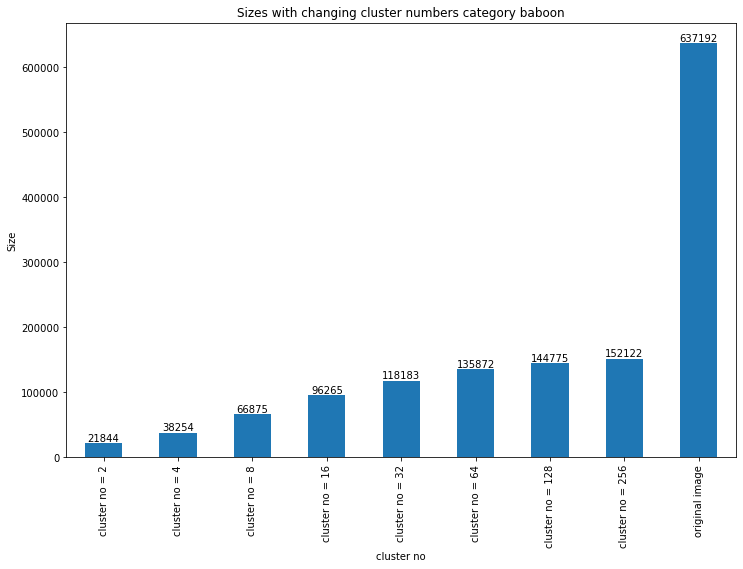

In [28]:
# plotting the unique color sizes of the original images

items = titles

sizes_series = pd.Series(np.array(sizes_baboon))

x_labels = items

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = sizes_series.plot(kind='bar')
ax.set_title('Sizes with changing cluster numbers category baboon')
ax.set_xlabel('cluster no')
ax.set_ylabel('Size')
ax.set_xticklabels(x_labels)

rects = ax.patches

labels = sizes_baboon

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

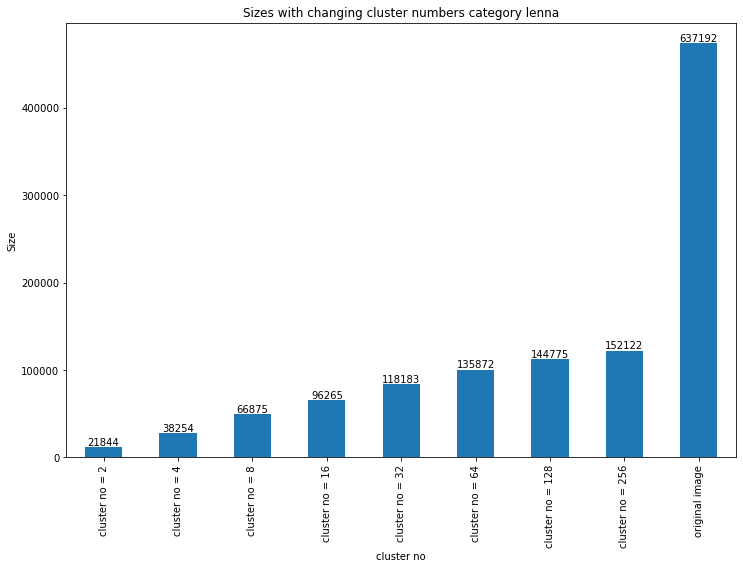

In [29]:
# plotting the unique color sizes of the original images

items = titles

sizes_series = pd.Series(np.array(sizes_lenna))

x_labels = items

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = sizes_series.plot(kind='bar')
ax.set_title('Sizes with changing cluster numbers category lenna')
ax.set_xlabel('cluster no')
ax.set_ylabel('Size')
ax.set_xticklabels(x_labels)

rects = ax.patches

labels = sizes_baboon

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

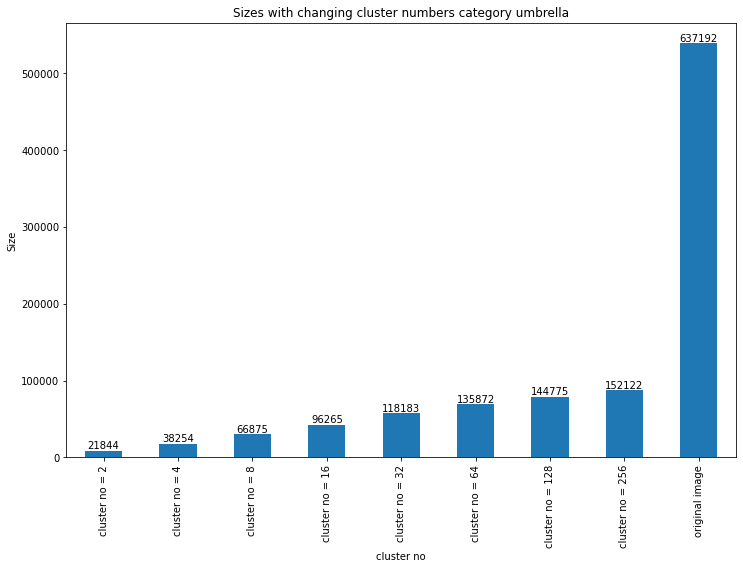

In [30]:
# plotting the unique color sizes of the original images

items = titles

sizes_series = pd.Series(np.array(sizes_umbrella))

x_labels = items

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = sizes_series.plot(kind='bar')
ax.set_title('Sizes with changing cluster numbers category umbrella')
ax.set_xlabel('cluster no')
ax.set_ylabel('Size')
ax.set_xticklabels(x_labels)

rects = ax.patches

labels = sizes_baboon

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

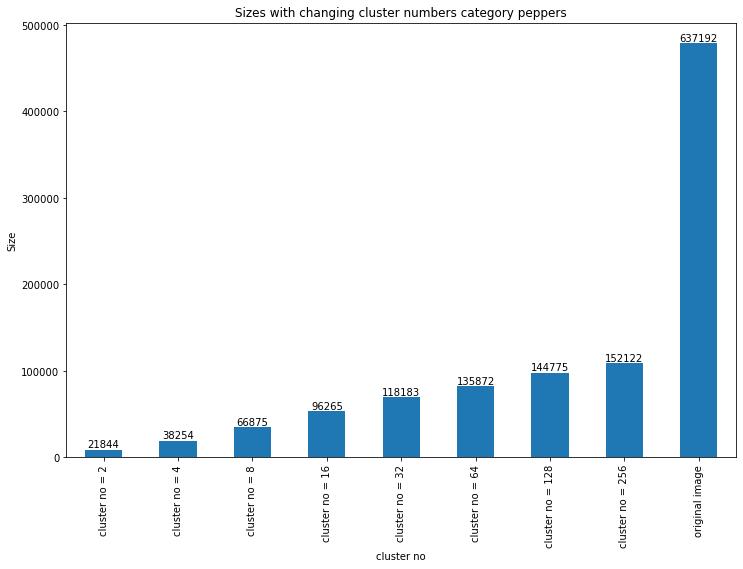

In [31]:
# plotting the unique color sizes of the original images

items = titles

sizes_series = pd.Series(np.array(sizes_peppers))

x_labels = items

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = sizes_series.plot(kind='bar')
ax.set_title('Sizes with changing cluster numbers category peppers')
ax.set_xlabel('cluster no')
ax.set_ylabel('Size')
ax.set_xticklabels(x_labels)

rects = ax.patches

labels = sizes_baboon

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

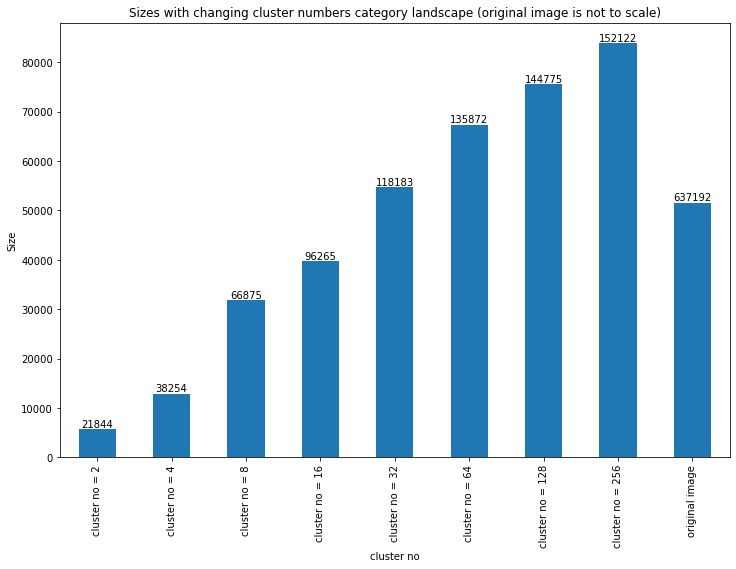

In [32]:
# plotting the unique color sizes of the original images

items = titles

sizes_series = pd.Series(np.array(sizes_landscape))

x_labels = items

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = sizes_series.plot(kind='bar')
ax.set_title('Sizes with changing cluster numbers category landscape (original image is not to scale)')
ax.set_xlabel('cluster no')
ax.set_ylabel('Size')
ax.set_xticklabels(x_labels)

rects = ax.patches

labels = sizes_baboon

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

In [33]:
# printing the unique colors of the images

def print_unique_colors(type_,images):
    
    for i in range(len(images)):
        cluster_no = str(2**(i + 1))
        image = images[i]
        unique_colors_of_the_image = len(set( tuple(v) for m2d in image for v in m2d))
        print('unique colors of the image type', type_, 'with', cluster_no, 'clusters = ', unique_colors_of_the_image)

In [34]:
print_unique_colors('baboon', baboon_compressed_images)

unique colors of the image type baboon with 2 clusters =  2
unique colors of the image type baboon with 4 clusters =  4
unique colors of the image type baboon with 8 clusters =  8
unique colors of the image type baboon with 16 clusters =  16
unique colors of the image type baboon with 32 clusters =  32
unique colors of the image type baboon with 64 clusters =  64
unique colors of the image type baboon with 128 clusters =  128
unique colors of the image type baboon with 256 clusters =  256


In [35]:
# calculate WCSS

def calculate_WCSS(original_image, kmeans):
    
    cluster_centers = kmeans.cluster_centers_
    num_classes = len(cluster_centers)
    sum_of_error = 0
    
    for i in range(len(original_image)):
        x = original_image[i]
        distances = np.zeros(num_classes)

        for j in range(num_classes):
            distances[j] = np.linalg.norm(cluster_centers[j] - x)

        ind = np.argmin(distances)
        error = distances[ind]**2
        sum_of_error = sum_of_error + error

    return sum_of_error


In [36]:
# method to calculate TSS

def calculate_TSS(flattened_image):
    
    length, dims = flattened_image.shape
    dims_mean = np.zeros(dims)

    for i in range(dims):
        
        mean = np.mean(flattened_image[:][i])
        dims_mean[i] = mean
        
    TSS = 0
    for i in range(length):
        x = flattened_image[i]
        sum_ = np.linalg.norm(dims_mean - x)
        sum_2 = sum_ ** 2
        TSS = TSS + sum_2
        

    return TSS



In [37]:
# calculate BCSS

def calculate_BCSS(tss, wcss):
    return tss - wcss


In [38]:
# explained variance i.e. silhoette coeffients

def explained_variance(bcss, tss): 
    return bcss / tss
    

In [39]:
# method for getting all the metrics for a single object

def calculate_metrics(flattened_image, kmeans):
    
    wcss = calculate_WCSS(flattened_image, kmeans)
    tss = calculate_TSS(flattened_image)
    bcss = calculate_BCSS(tss, wcss)
    explain_variance = explained_variance(bcss, tss)
    
    return wcss, tss, bcss, explain_variance
    

In [40]:
# method for getting all the metrics of multiple kmeans objects

def get_metrics_of_multiple_kmeans_objects(flattened_image, kmeans_objs):
    
    
    wcss_ = []
    tss_ = []
    bcss_ = []
    explained_variance_ = []

    for i in range(len(kmeans_objs)):
        
        kmeans = kmeans_objs[i]
        wcss, tss, bcss, explain_variance = calculate_metrics(flattened_image, kmeans)
        
        wcss_.append(wcss)
        tss_.append(tss)
        bcss_.append(bcss)
        explained_variance_.append(explain_variance)
        
    return wcss_, tss_, bcss_, explained_variance_
    

In [41]:
# calculate all the necessary metrics for each image

wcss_baboon, tss_baboon, bcss_baboon, explained_variance_baboon = get_metrics_of_multiple_kmeans_objects(scaled_baboon, kmeans_baboons)
wcss_lenna, tss_lenna, bcss_lenna, explained_variance_lenna = get_metrics_of_multiple_kmeans_objects(scaled_lenna, kmeans_lenas)
wcss_umbrella, tss_umbrella, bcss_umbrella, explained_variance_umbrella = get_metrics_of_multiple_kmeans_objects(scaled_umbrella, kmeans_umbrellas)
wcss_peppers, tss_peppers, bcss_peppers, explained_variance_peppers = get_metrics_of_multiple_kmeans_objects(scaled_peppers, kmenas_pepperss)
wcss_landscape, tss_landscape, bcss_landscape, explained_variance_landscape = get_metrics_of_multiple_kmeans_objects(scaled_landscape, kmeans_landscapes)


([<matplotlib.axis.XTick at 0x251d8b81ca0>,
 <a list of 8 Text major ticklabel objects>)

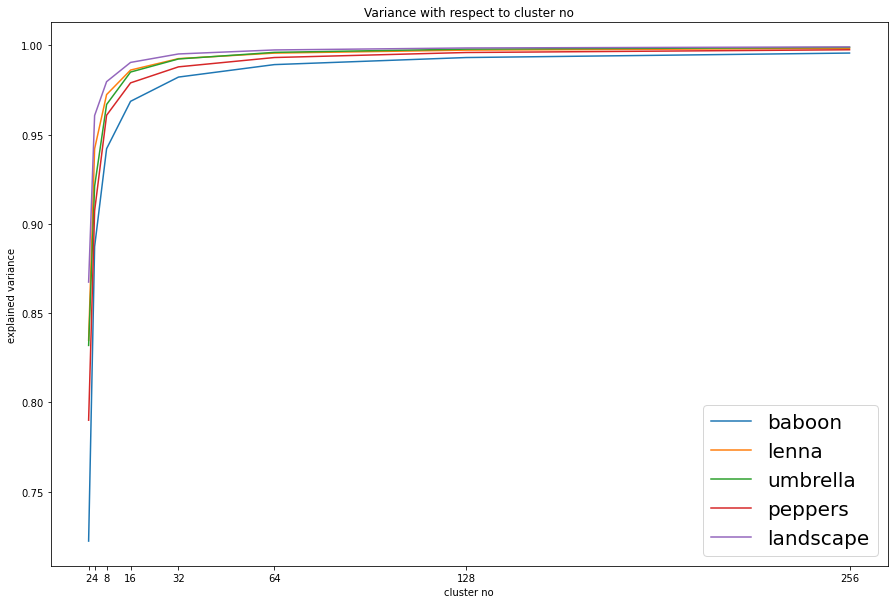

In [42]:
plt.figure(figsize=(15,10))

plt_1 = plt.plot(cluster_nos, explained_variance_baboon, label= 'baboon')
plt_2 = plt.plot(cluster_nos, explained_variance_lenna, label= 'lenna')
plt_3 = plt.plot(cluster_nos, explained_variance_umbrella, label= 'umbrella')
plt_4 = plt.plot(cluster_nos, explained_variance_peppers, label= 'peppers')
plt_5 = plt.plot(cluster_nos, explained_variance_landscape, label= 'landscape')


plt.xlabel('cluster no')
plt.ylabel('explained variance')
plt.title('Variance with respect to cluster no')
plt.legend(loc=4, prop={'size': 20})


plt.xticks(cluster_nos)

([<matplotlib.axis.XTick at 0x251dbd145e0>,
 <a list of 8 Text major ticklabel objects>)

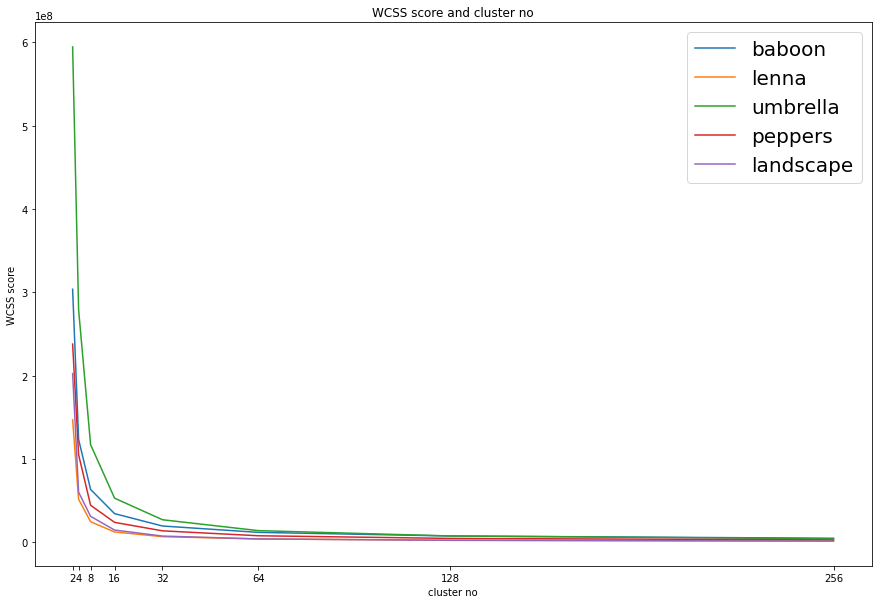

In [43]:
plt.figure(figsize=(15,10))

plt_1 = plt.plot(cluster_nos, wcss_baboon, label= 'baboon')
plt_2 = plt.plot(cluster_nos, wcss_lenna, label= 'lenna')
plt_3 = plt.plot(cluster_nos, wcss_umbrella, label= 'umbrella')
plt_4 = plt.plot(cluster_nos, wcss_peppers, label= 'peppers')
plt_5 = plt.plot(cluster_nos, wcss_landscape, label= 'landscape')


plt.xlabel('cluster no')
plt.ylabel('WCSS score')
plt.title('WCSS score and cluster no')
plt.legend(loc=1, prop={'size': 20})
plt.xticks(cluster_nos)

([<matplotlib.axis.XTick at 0x251dbd83190>,
 <a list of 8 Text major ticklabel objects>)

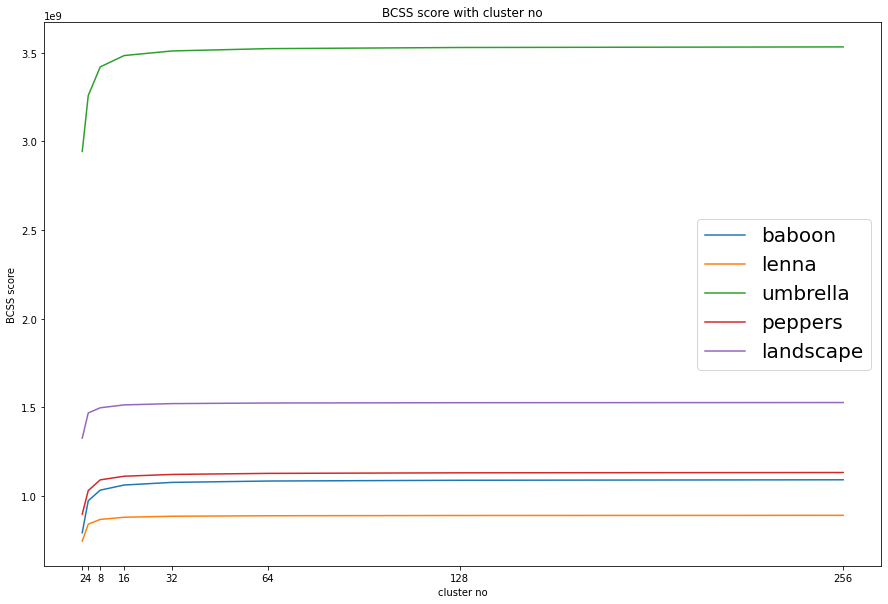

In [44]:
plt.figure(figsize=(15,10))

plt_1 = plt.plot(cluster_nos, bcss_baboon, label= 'baboon')
plt_2 = plt.plot(cluster_nos, bcss_lenna, label= 'lenna')
plt_3 = plt.plot(cluster_nos, bcss_umbrella, label= 'umbrella')
plt_4 = plt.plot(cluster_nos, bcss_peppers, label= 'peppers')
plt_5 = plt.plot(cluster_nos, bcss_landscape, label= 'landscape')


plt.xlabel('cluster no')
plt.ylabel('BCSS score')
plt.title('BCSS score with cluster no')
plt.legend(prop={'size': 20})
plt.xticks(cluster_nos)

In [45]:
# Finding closest color in rgb for all centroids
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

# get requested color name
def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return closest_name


# get unique colors from the image
def unique_color_method_colors(image):
    return list(set(tuple(v) for m2d in image for v in m2d ))

In [46]:
# get unique colors from multiple images

def get_unique_colors_of_comp_imgs(compressed_images):
    
    compressed_images_unique_colors = []

    for i in range(len(compressed_images)):

        unique_colors = list(unique_color_method_colors(compressed_images[i]))
        color_names = []
        for j in range(len(unique_colors)):
            color_name = get_colour_name(unique_colors[j])
            color_names.append(color_name)

        compressed_images_unique_colors.append(color_names)

    return compressed_images_unique_colors

In [47]:
unique_colors_baboon_compressed = get_unique_colors_of_comp_imgs(baboon_compressed_images)
unique_colors_lenna_compressed = get_unique_colors_of_comp_imgs(lenna_compressed_images)
unique_colors_umbrella_compressed = get_unique_colors_of_comp_imgs(umbrella_compressed_images)
unique_colors_peppers_compressed = get_unique_colors_of_comp_imgs(peppers_compressed_images)
unique_colors_landscape_compressed = get_unique_colors_of_comp_imgs(landscape_compressed_images)


In [48]:
# prepare the table requested

df = pd.DataFrame()
filenames_total = filenames_baboon + filenames_lenna + filenames_peppers + filenames_umbrella + filenames_landscape
df['image names'] = filenames_total
cluster_no = list(cluster_nos) + list(cluster_nos) + list(cluster_nos) + list(cluster_nos) + list(cluster_nos)
df['cluster number'] = cluster_no
sizes = sizes_baboon[: len(sizes_baboon) - 1] + sizes_lenna[: len(sizes_baboon) - 1] + sizes_peppers[: len(sizes_baboon) - 1] + sizes_umbrella[: len(sizes_baboon) - 1] + sizes_landscape[: len(sizes_baboon) - 1]
df['size'] = sizes
wcss_table = wcss_baboon + wcss_lenna + wcss_peppers + wcss_umbrella + wcss_landscape
df['wcss'] = wcss_table
bcss_table = bcss_baboon + bcss_lenna + bcss_peppers + bcss_umbrella + bcss_landscape
df['bcss'] = bcss_table
var_table = explained_variance_baboon + explained_variance_lenna + explained_variance_peppers + explained_variance_umbrella + explained_variance_landscape
df['explained variance'] = var_table
df['wcss'] = df['wcss'].astype('uint64')
df['bcss'] = df['bcss'].astype('uint64')
unique_color_names = unique_colors_baboon_compressed + unique_colors_lenna_compressed + unique_colors_umbrella_compressed + unique_colors_peppers_compressed + unique_colors_landscape_compressed
df['unique color names'] = unique_color_names

df

image names  cluster number    size  \
0        baboon_compressed_2_no_of_clusters.png               2   21844   
1        baboon_compressed_4_no_of_clusters.png               4   38254   
2        baboon_compressed_8_no_of_clusters.png               8   66875   
3       baboon_compressed_16_no_of_clusters.png              16   96265   
4       baboon_compressed_32_no_of_clusters.png              32  118183   
5       baboon_compressed_64_no_of_clusters.png              64  135872   
6      baboon_compressed_128_no_of_clusters.png             128  144775   
7      baboon_compressed_256_no_of_clusters.png             256  152122   
8         lenna_compressed_2_no_of_clusters.png               2   11768   
9         lenna_compressed_4_no_of_clusters.png               4   27872   
10        lenna_compressed_8_no_of_clusters.png               8   49808   
11       lenna_compressed_16_no_of_clusters.png              16   65397   
12       lenna_compressed_32_no_of_clusters.png              32   83843   
13       lenna_compressed_64_no_of_clusters.png              64  100418   
14      lenna_compressed_128_no_of_clusters.png             128  112663   
15      lenna_compressed_256_no_of_clusters.png             256  122011   
16      peppers_compressed_2_no_of_clusters.png               2    9138   
17      peppers_compressed_4_no_of_clusters.png               4   19505   
18      peppers_compressed_8_no_of_clusters.png               8   34628   
19     peppers_compressed_16_no_of_clusters.png              16   53585   
20     peppers_compressed_32_no_of_clusters.png              32   69835   
21     peppers_compressed_64_no_of_clusters.png              64   82019   
22    peppers_compressed_128_no_of_clusters.png             128   97806   
23    peppers_compressed_256_no_of_clusters.png             256  108578   
24     umbrella_compressed_2_no_of_clusters.png               2    8714   
25     umbrella_compressed_4_no_of_clusters.png               4   18092   
26     umbrella_compressed_8_no_of_clusters.png               8   30058   
27    umbrella_compressed_16_no_of_clusters.png              16   42804   
28    umbrella_compressed_32_no_of_clusters.png              32   57574   
29    umbrella_compressed_64_no_of_clusters.png              64   69353   
30   umbrella_compressed_128_no_of_clusters.png             128   78956   
31   umbrella_compressed_256_no_of_clusters.png             256   87880   
32    landscape_compressed_2_no_of_clusters.png               2    5678   
33    landscape_compressed_4_no_of_clusters.png               4   12895   
34    landscape_compressed_8_no_of_clusters.png               8   31788   
35   landscape_compressed_16_no_of_clusters.png              16   39765   
36   landscape_compressed_32_no_of_clusters.png              32   54699   
37   landscape_compressed_64_no_of_clusters.png              64   67367   
38  landscape_compressed_128_no_of_clusters.png             128   75630   
39  landscape_compressed_256_no_of_clusters.png             256   83855   

         wcss        bcss  explained variance  \
0   303688890   790166560            0.722368   
1   123334263   970521187            0.887248   
2    63302088  1030553362            0.942129   
3    34275882  1059579568            0.968665   
4    19420770  1074434680            0.982246   
5    11784074  1082071376            0.989227   
6     7456593  1086398857            0.993183   
7     4710313  1089145137            0.995694   
8   146950560   742853978            0.834851   
9    51534103   838270434            0.942084   
10   24526723   865277814            0.972436   
11   12299646   877504891            0.986177   
12    6608711   883195827            0.992573   
13    3857263   885947274            0.995665   
14    2379998   887424539            0.997325   
15    1498338   888306200            0.998316   
16  237842987   895179256            0.790081   
17  104995779  1028026464            0.907331   
18   44341121  1088681121    

In [49]:
# for saving table to put in the report I commented these lines because of the dependency issues
# I dropped unique color names column since 256 colors is too much to display on a report
# on the table above the cell all the unique colors can be seen

# import dataframe_image as dfi

# df_for_report = df



# df_for_report = df_for_report.drop(['unique color names'], axis=1)

# df_styled = df_for_report.style.background_gradient() #adding a gradient based on values in cell


# dfi.export(df_styled,"mytable.png")


In [50]:
# elbow point is calculated using explained variance, better expalanation is in the report

def calculate_elbow_point(var_):
    
    
    x1, y1 = 0, var_[0]
    x2, y2 = len(var_), var_[-1]

    distances = []
    for i in range(len(var_)):
        x0 = i
        y0 = var_[i]
        numerator = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        
    distances = np.array(distances)
    ind = np.argmax(distances)
    elbow_point = 2 ** (ind + 1)
    
    return elbow_point, ind


In [51]:
# calculating all the necessary elbow points, sizes with respect to elbow points
# and explained variances with respect to elbow points

elbow_point_baboon, ind_baboon = calculate_elbow_point(explained_variance_baboon)
elbow_point_lenna, ind_lenna = calculate_elbow_point(explained_variance_lenna)
elbow_point_umbrella, ind_umbrella = calculate_elbow_point(explained_variance_umbrella)
elbow_point_peppers, ind_peppers = calculate_elbow_point(explained_variance_peppers)
elbow_point_landscape, ind_landscape = calculate_elbow_point(explained_variance_landscape)

elbow_points = []

elbow_points.append(elbow_point_baboon)
elbow_points.append(elbow_point_lenna)
elbow_points.append(elbow_point_umbrella)
elbow_points.append(elbow_point_peppers)
elbow_points.append(elbow_point_landscape)

explained_variance_for_elbow = []

explained_variance_for_elbow.append(explained_variance_baboon[ind_baboon])
explained_variance_for_elbow.append(explained_variance_lenna[ind_lenna])
explained_variance_for_elbow.append(explained_variance_umbrella[ind_umbrella])
explained_variance_for_elbow.append(explained_variance_peppers[ind_peppers])
explained_variance_for_elbow.append(explained_variance_landscape[ind_landscape])

sizes_elbow = []

sizes_elbow.append(sizes_baboon[ind_baboon])
sizes_elbow.append(sizes_lenna[ind_lenna])
sizes_elbow.append(sizes_umbrella[ind_umbrella])
sizes_elbow.append(sizes_peppers[ind_peppers])
sizes_elbow.append(sizes_landscape[ind_landscape])

print('optimal elbow point for baboon cluster size= ', elbow_point_baboon)
print('optimal elbow point for lenna cluster size= ', elbow_point_lenna)
print('optimal elbow point for umbrella cluster size= ', elbow_point_umbrella)
print('optimal elbow point for peppers cluster size= ', elbow_point_peppers)
print('optimal elbow point for landscape cluster size= ', elbow_point_landscape)



optimal elbow point for baboon cluster size=  8
optimal elbow point for lenna cluster size=  8
optimal elbow point for umbrella cluster size=  8
optimal elbow point for peppers cluster size=  8
optimal elbow point for landscape cluster size=  8


([<matplotlib.axis.XTick at 0x251d3c9fc40>,
 <a list of 8 Text major ticklabel objects>)

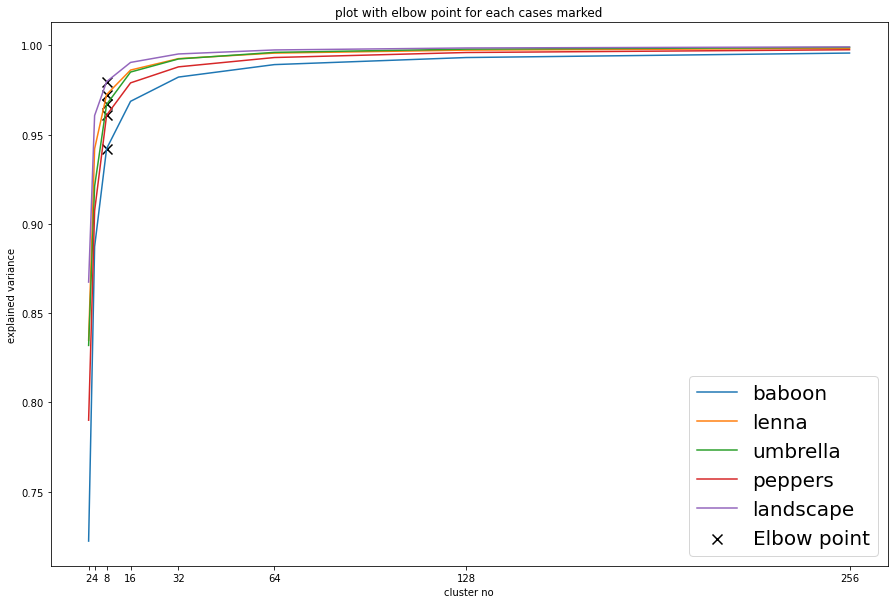

In [52]:
# now marking the elbow points on the explained variance plot

f = plt.figure(figsize=(15,10))

plt_1 = plt.plot(cluster_nos, explained_variance_baboon, label= 'baboon')
plt_2 = plt.plot(cluster_nos, explained_variance_lenna, label= 'lenna')
plt_3 = plt.plot(cluster_nos, explained_variance_umbrella, label= 'umbrella')
plt_4 = plt.plot(cluster_nos, explained_variance_peppers, label= 'peppers')
plt_5 = plt.plot(cluster_nos, explained_variance_landscape, label= 'landscape')
plt_6 = plt.scatter(elbow_points, explained_variance_for_elbow, marker='x', s=100, color='black', label='Elbow point')

plt.xlabel('cluster no')
plt.ylabel('explained variance')
plt.title('plot with elbow point for each cases marked')
plt.legend(loc=4, prop={'size': 20})

plt.xticks(cluster_nos)



([<matplotlib.axis.XTick at 0x251daafb040>,
 <a list of 8 Text major ticklabel objects>)

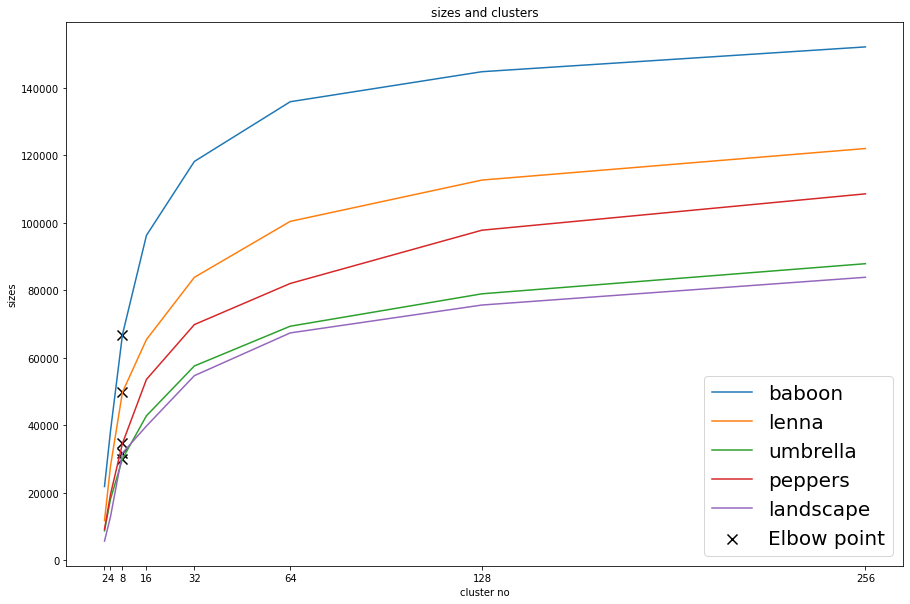

In [53]:

plt.figure(figsize=(15,10))

plt_1 = plt.plot(cluster_nos, sizes_baboon[:len(sizes_baboon) - 1], label= 'baboon')
plt_2 = plt.plot(cluster_nos, sizes_lenna[:len(sizes_baboon) - 1], label= 'lenna')
plt_3 = plt.plot(cluster_nos, sizes_umbrella[:len(sizes_baboon) - 1], label= 'umbrella')
plt_4 = plt.plot(cluster_nos, sizes_peppers[:len(sizes_baboon) - 1], label= 'peppers')
plt_5 = plt.plot(cluster_nos, sizes_landscape[:len(sizes_baboon) - 1], label= 'landscape')
plt_6 = plt.scatter(elbow_points, sizes_elbow, marker='x', s=100, color='black', label='Elbow point')

plt.xlabel('cluster no')
plt.ylabel('sizes')
plt.title('sizes and clusters')
plt.legend(loc=4, prop={'size': 20})
plt.xticks(cluster_nos)